# California House Price Prediction

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [350]:
df=pd.read_csv('/Users/taruninarra/Documents/Data Science trainiing/housing california/housing.csv')

In [351]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [353]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [354]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


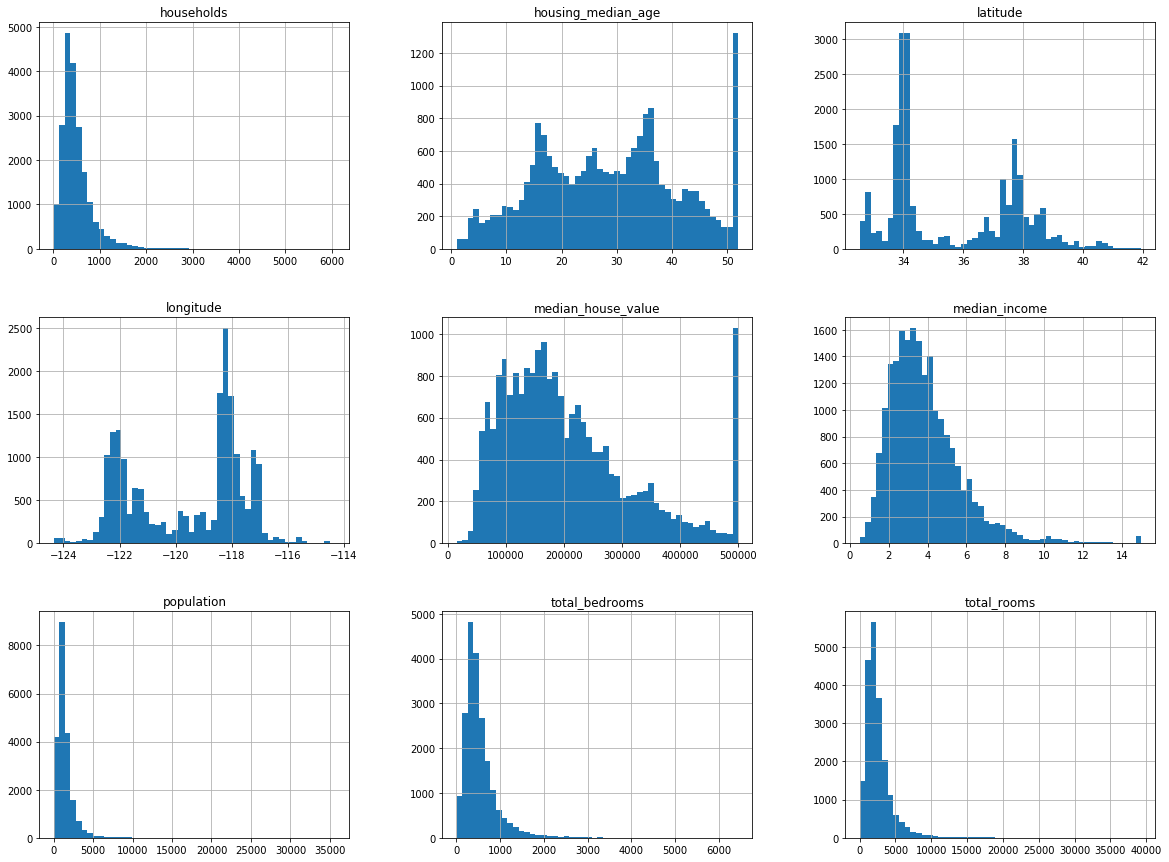

In [355]:
df.hist(bins=50,figsize=(20,15))
plt.show()

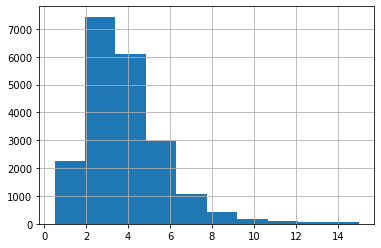

In [356]:
df['median_income'].hist()

In [357]:
# dividing the 1.5 to limit the number of income categories
df['income_cat'] = np.ceil(df['median_income'] / 1.5)

# labelling everything above 5 as 5
df['income_cat'].where(df['income_cat'] < 5, other=5.0, inplace=True)

In [358]:
df['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

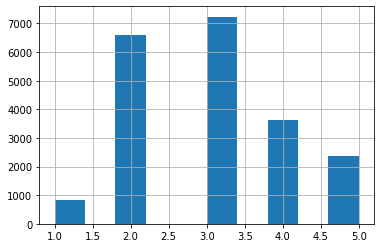

In [359]:
df['income_cat'].hist()

In [360]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)

for train_idx, test_idx in split.split(df, df['income_cat']):
    strat_train_set =df.loc[train_idx]
    strat_test_set = df.loc[test_idx]

In [361]:
df['income_cat'].value_counts() / len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [362]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [363]:
# lets also look at random shuffle split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=29)

In [364]:
def income_category_proportions(data):
    return data['income_cat'].value_counts() / len(data)


compare_props = pd.DataFrame({
    "overall": income_category_proportions(df),
    "stratified": income_category_proportions(strat_train_set),
    "random": income_category_proportions(train_set)
}).sort_index()

compare_props['rand. % err'] = 100 * compare_props['random']/compare_props['overall'] - 100
compare_props['strat. % err'] = 100 * compare_props['stratified']/compare_props['overall'] - 100

compare_props

,overall,stratified,random,rand. % err,strat. % err
1.0,0.039826,0.039850,0.039123,-1.763990,0.060827
2.0,0.318847,0.318859,0.320676,0.573621,0.003799
3.0,0.350581,0.350594,0.352047,0.418049,0.003455
4.0,0.176308,0.176296,0.174964,-0.762572,-0.006870
5.0,0.114438,0.114402,0.113190,-1.090178,-0.031753


In [365]:
for item_set in (strat_train_set, strat_test_set):
    item_set.drop('income_cat', axis=1, inplace=True)

# Visualizing the data

In [366]:
df = strat_train_set.copy()

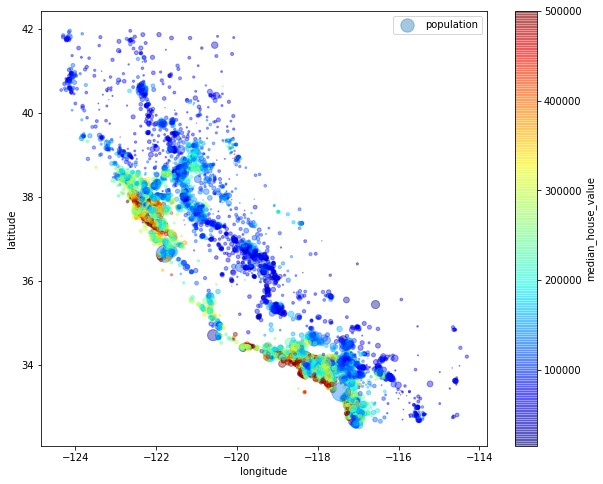

In [367]:
# 'c' is for adding coclor, 's' is for adding circles; the value of 's' represents the radius of the circle

df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
             s=df['population']/100, label='population', c='median_house_value', 
             cmap=plt.get_cmap('jet'), colorbar=True, figsize=(10,8), sharex=False)
plt.legend()

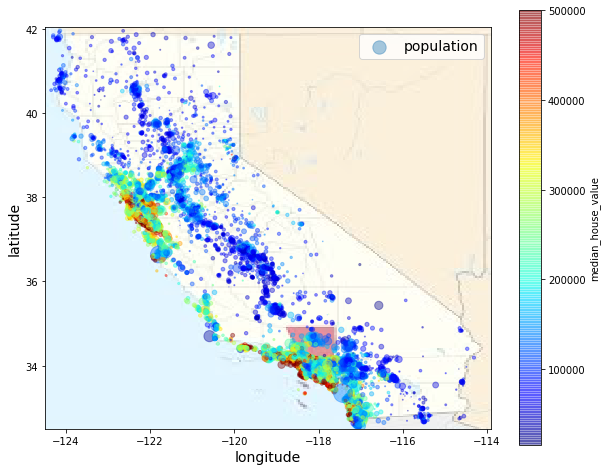

In [368]:
import matplotlib.image as mpimg

df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
             s=df['population']/100, label='population', c='median_house_value', 
             cmap=plt.get_cmap('jet'), colorbar=True, figsize=(10,8), sharex=False)

# # load the png image here
california_img = mpimg.imread('/Users/taruninarra/Documents/Data Science trainiing/housing california/images.jpeg')

plt.imshow(california_img, extent= [-124.5, -113.9, 32.5, 42.05], alpha=0.5, cmap=plt.get_cmap('jet'))

plt.xlabel("longitude", fontsize=14)
plt.ylabel("latitude", fontsize=14)

plt.legend(fontsize=14)
plt.show()

# Looking for Correlations
(using Pandas's Pearson's Distance Correlation equation)

In [369]:
corr_matrix = df.corr()

# correlation of every other attribute with median_house_value in desc order
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691071
total_rooms           0.127306
housing_median_age    0.108483
households            0.060084
total_bedrooms        0.043921
population           -0.028341
longitude            -0.043780
latitude             -0.146422
Name: median_house_value, dtype: float64

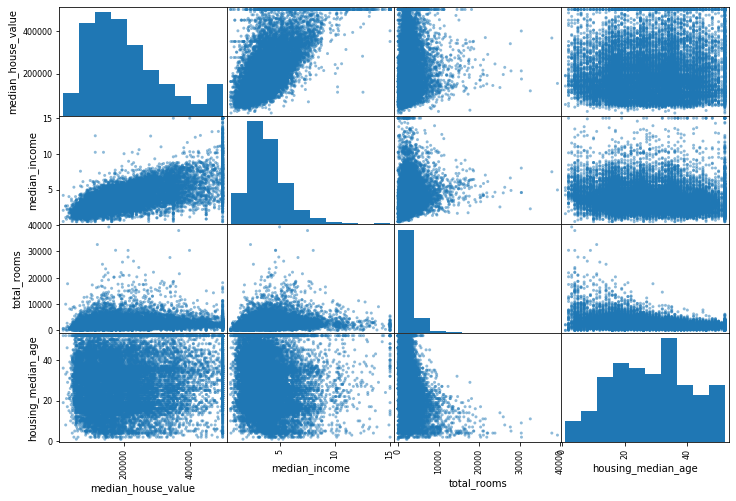

In [370]:
imp_attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

from pandas.plotting import scatter_matrix

scatter_matrix(df[imp_attributes], figsize=(12,8))
plt.show()

[0, 14, 0, 550000]

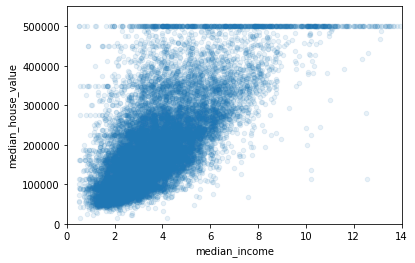

In [371]:
df.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.axis([0, 14, 0, 550000])

# Feature Engineering

In [372]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']


In [373]:
# looking at the corr matrix again with new features
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691071
rooms_per_household         0.151804
total_rooms                 0.127306
housing_median_age          0.108483
households                  0.060084
total_bedrooms              0.043921
population_per_household   -0.021688
population                 -0.028341
longitude                  -0.043780
latitude                   -0.146422
bedrooms_per_room          -0.253572
Name: median_house_value, dtype: float64

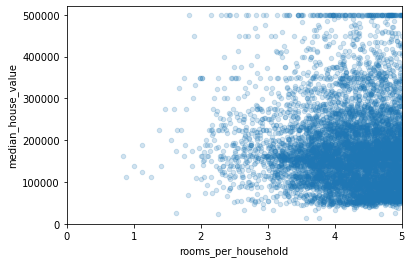

In [374]:
df.plot(kind='scatter', x='rooms_per_household', y='median_house_value', alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

# Preparing the data for ML algos

In [375]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [376]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 7771 to 20194
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16349 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### Replacing null values with median

In [377]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()


In [378]:
median_ = housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median_, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5654,-118.30,33.73,42.0,1731.0,433.0,866.0,403.0,2.7451,NEAR OCEAN
14930,-117.02,32.66,19.0,771.0,433.0,376.0,108.0,6.6272,NEAR OCEAN
9814,-121.93,36.62,34.0,2351.0,433.0,1063.0,428.0,3.7250,NEAR OCEAN
14986,-117.03,32.73,34.0,2061.0,433.0,1169.0,400.0,3.5096,NEAR OCEAN
4767,-118.37,34.03,37.0,1236.0,433.0,966.0,292.0,3.0694,<1H OCEAN


In [379]:
# levarging the Scikit Learn's SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [380]:
housing_num = housing.drop('ocean_proximity', axis=1)

imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [381]:
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

In [382]:
housing_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

In [383]:
X = imputer.transform(housing_num)

In [384]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [385]:
# cross checking for null values
housing_tr.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
dtype: bool

### Handling categoriccal data

In [386]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

7771      <1H OCEAN
9352       NEAR BAY
18657    NEAR OCEAN
4873      <1H OCEAN
12350        INLAND
18621    NEAR OCEAN
15543     <1H OCEAN
14129    NEAR OCEAN
18136     <1H OCEAN
14418    NEAR OCEAN
Name: ocean_proximity, dtype: object

In [387]:
# using Pandas factorize() method
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 1, 2, 0, 3, 2, 0, 2, 0, 2])

In [388]:
housing_categories

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

In [389]:
housing_cat_encoded.shape

(16512,)

In [390]:

# using Scikit Learn's OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(1, -1))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [391]:
housing_cat_1hot

<1x16512 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [392]:
# now to represent a sparse matrix call the 'toarray()' method

housing_cat_1hot.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

### Custom Transformations


In [393]:
from sklearn.base import BaseEstimator, TransformerMixin

# grab columns indexes
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # nothing doing here
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [394]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [395]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, 
                                     columns=list(housing.columns)+['rooms_per_household', 'population_per_household'])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-118.09,33.92,35,1994,419,1491,428,3.7383,<1H OCEAN,4.65888,3.48364
1,-122.57,37.96,52,3458,468,1449,471,9.1834,NEAR BAY,7.34183,3.07643
2,-121.96,36.97,23,4324,1034,1844,875,3.0777,NEAR OCEAN,4.94171,2.10743
3,-118.28,34.02,52,281,103,470,96,1.9375,<1H OCEAN,2.92708,4.89583
4,-116.5,33.81,26,5032,1229,3086,1183,2.5399,INLAND,4.25359,2.60862


## Setting up the Pipeline for all the data preprocessing

In [396]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.74049299, -0.80402818,  0.50616062, ..., -0.30771122,
         0.03273077, -0.05512278],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.75666902,
        -0.0023651 , -1.17763788],
       [-1.18967887,  0.61940394, -0.45115041, ..., -0.19550447,
        -0.08587951,  0.38012387],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ..., -0.06328319,
        -0.06658929, -0.48812906],
       [-0.09741107,  0.51673015,  1.22414389, ..., -0.43053438,
         0.07888273,  0.19240118],
       [ 0.17690276, -0.64535051, -1.00958184, ..., -0.32344572,
        -0.05235215,  0.40450624]])

In [397]:
from sklearn.base import BaseEstimator, TransformerMixin

class DFSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_name):
        self.attribute_name = attribute_name
    
    def fit(self, X, y=None):
        return self # no training at all
    
    def transform(self, X, y=None):
        return X[self.attribute_name].values

In [398]:
num_attribs = list(housing_num.columns)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ("selector", DFSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("selector", DFSelector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

## Complete Pipeline

In [399]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [400]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.74049299, -0.80402818,  0.50616062, ...,  0.        ,
         0.        ,  0.        ],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.        ,
         1.        ,  0.        ],
       [-1.18967887,  0.61940394, -0.45115041, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09741107,  0.51673015,  1.22414389, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17690276, -0.64535051, -1.00958184, ...,  0.        ,
         0.        ,  1.        ]])

## Selecting & Training Models

In [401]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [402]:
# trying the full pipeline on some instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [403]:
print("Prediction:", lin_reg.predict(some_data_prepared))
print("Actual Labels:", list(some_labels))

Prediction: [209526.30110297 455497.76141409 252936.22210586 173615.33127943
 114294.56522481]
Actual Labels: [166200.0, 500001.0, 263800.0, 38800.0, 94800.0]


In [404]:
from sklearn.metrics import mean_squared_error

housing_pred = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67949.91466225038

In [405]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [406]:
housing_pred = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Cross Validation

In [407]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [408]:
def display_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("std:", scores.std())
    
display_scores(tree_rmse_scores)

scores: [70343.73556735 68478.41893155 68919.8190329  72769.81052085
 69181.20658239 68775.6263921  68856.05756587 69328.16901826
 67511.68042897 71179.63149553]
mean: 69534.4155535767
std: 1435.8640210544183


In [409]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse = np.sqrt(-lin_scores)

display_scores(lin_rmse)

scores: [67641.22210761 69245.155892   65690.83401976 67581.651926
 66586.04760743 66937.30771561 67397.33645629 69807.64170261
 66660.63451034 74883.89423608]
mean: 68243.17261737355
std: 2500.726216291981


In [410]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=29)
rf_reg.fit(housing_prepared, housing_labels)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=29, verbose=0,
                      warm_start=False)

In [411]:
housing_pred = rf_reg.predict(housing_prepared)
rf_mse = mean_squared_error(housing_labels, housing_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

21989.607999546064

In [412]:
rf_scores = cross_val_score(rf_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

display_scores(np.sqrt(-rf_scores))

scores: [50727.85369442 53777.59672741 50196.9006331  52163.3145675
 51773.76520866 52548.65794101 51587.29054027 51131.27756361
 51084.53618231 55110.13075575]
mean: 52010.13238140342
std: 1408.6596990564344


## Fine Tuning our Model

In [413]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

rf = RandomForestRegressor()

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [414]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [415]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [416]:
cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

63265.06196083386 {'max_features': 2, 'n_estimators': 3}
54200.79261417969 {'max_features': 2, 'n_estimators': 10}
52278.47273439792 {'max_features': 2, 'n_estimators': 30}
60098.19822836952 {'max_features': 4, 'n_estimators': 3}
52441.60252081445 {'max_features': 4, 'n_estimators': 10}
49975.999696043255 {'max_features': 4, 'n_estimators': 30}
58285.55901575446 {'max_features': 6, 'n_estimators': 3}
51777.294123724096 {'max_features': 6, 'n_estimators': 10}
49532.84324446637 {'max_features': 6, 'n_estimators': 30}
58335.536324181914 {'max_features': 8, 'n_estimators': 3}
50747.57681505144 {'max_features': 8, 'n_estimators': 10}
49641.95034639151 {'max_features': 8, 'n_estimators': 30}
61619.63961549594 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53373.32214922615 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58939.084872509324 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51799.49709067027 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [417]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.072858,0.010208,0.004179,0.000160,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.753415e+09,-3.720141e+09,-4.109370e+09,-4.020905e+09,-4.408671e+09,-4.002468e+09,2.523922e+08,18
1,0.219748,0.015310,0.012174,0.000952,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.834384e+09,-2.963020e+09,-2.771687e+09,-3.058251e+09,-3.061312e+09,-2.937726e+09,1.172036e+08,11
2,0.700909,0.041904,0.038868,0.004089,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.806436e+09,-2.691454e+09,-2.693160e+09,-2.674643e+09,-2.799492e+09,-2.733039e+09,5.750317e+07,8
3,0.126133,0.014976,0.004827,0.000734,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.684207e+09,-3.790738e+09,-3.609127e+09,-3.319018e+09,-3.655801e+09,-3.611793e+09,1.580646e+08,16
4,0.368526,0.041047,0.014120,0.002189,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.747081e+09,-2.693880e+09,-2.660044e+09,-2.786339e+09,-2.863282e+09,-2.750122e+09,7.127562e+07,9
5,1.111462,0.045162,0.033710,0.001155,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.526164e+09,-2.388527e+09,-2.454857e+09,-2.455573e+09,-2.662906e+09,-2.497601e+09,9.341397e+07,3
6,0.134339,0.002450,0.004043,0.000268,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.320049e+09,-3.253262e+09,-3.495552e+09,-3.304069e+09,-3.613166e+09,-3.397206e+09,1.353921e+08,13
7,0.502208,0.021262,0.012717,0.000779,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.664417e+09,-2.588607e+09,-2.646455e+09,-2.712028e+09,-2.792968e+09,-2.680888e+09,6.856263e+07,6
8,1.564567,0.054684,0.035775,0.004924,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.506288e+09,-2.346273e+09,-2.432324e+09,-2.420542e+09,-2.562102e+09,-2.453503e+09,7.431594e+07,1
9,0.193063,0.007832,0.004889,0.000845,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.369991e+09,-3.449025e+09,-3.360717e+09,-3.430140e+09,-3.405298e+09,-3.403035e+09,3.387585e+07,14


In [418]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8)
}

rf_reg1 = RandomForestRegressor(random_state=29)
rf_search = RandomizedSearchCV(rf_reg1, params_distribs, cv=5, scoring='neg_mean_squared_error', random_state=29, n_iter=10)

rf_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [419]:
cvres = rf_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

48554.82808753229 {'max_features': 2, 'n_estimators': 3}
49443.37797311243 {'max_features': 2, 'n_estimators': 10}
53570.23831992085 {'max_features': 2, 'n_estimators': 30}
50902.01282842812 {'max_features': 4, 'n_estimators': 3}
53580.16560373702 {'max_features': 4, 'n_estimators': 10}
48632.80337452587 {'max_features': 4, 'n_estimators': 30}
53454.896572172365 {'max_features': 6, 'n_estimators': 3}
48524.00649818885 {'max_features': 6, 'n_estimators': 10}
48560.27239481039 {'max_features': 6, 'n_estimators': 30}
53446.573293355774 {'max_features': 8, 'n_estimators': 3}


In [420]:
rf_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=149,
                      n_jobs=None, oob_score=False, random_state=29, verbose=0,
                      warm_start=False)

In [421]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.17735024e-02, 7.45599794e-02, 4.03458621e-02, 1.73289821e-02,
       1.56350033e-02, 1.75987434e-02, 1.50076341e-02, 3.01001834e-01,
       6.70914748e-02, 1.01755517e-01, 8.07874720e-02, 1.50905242e-02,
       1.56736854e-01, 2.27184333e-04, 8.57893069e-03, 6.48050229e-03])

In [422]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes))

[(0.00022718433258206967, 'ISLAND'),
 (0.006480502290497367, 'NEAR OCEAN'),
 (0.008578930690904905, 'NEAR BAY'),
 (0.015007634075944316, 'households'),
 (0.015090524189142274, '<1H OCEAN'),
 (0.015635003330617674, 'total_bedrooms'),
 (0.017328982097842737, 'total_rooms'),
 (0.01759874340268725, 'population'),
 (0.04034586212965554, 'housing_median_age'),
 (0.06709147480655674, 'rooms_per_hhold'),
 (0.07455997937216956, 'latitude'),
 (0.08078747203582276, 'bedrooms_per_room'),
 (0.08177350241795647, 'longitude'),
 (0.1017555168420065, 'pop_per_hhold'),
 (0.15673685372807217, 'INLAND'),
 (0.3010018342575417, 'median_income')]

In [423]:
full_pipeline_with_predictions = Pipeline([
    ("data_prep", full_pipeline),
    ("linear", LinearRegression())
])

full_pipeline_with_predictions.fit(housing, housing_labels)
full_pipeline_with_predictions.predict(some_data)

array([209526.30110297, 455497.76141409, 252936.22210586, 173615.33127943,
       114294.56522481])

In [424]:
my_model = full_pipeline_with_predictions

# saving the model
from sklearn.externals import joblib
# saving 
joblib.dump(my_model, "my_model.pkl")

# loading the saved model
my_model_loaded = joblib.load("my_model.pkl")